In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import random
import math
from itertools import permutations
import matplotlib.pyplot as plt

drive.mount('/content/drive/')
distance = pd.read_csv('/content/drive/My Drive/colab/SA TS Problems.csv')

Mounted at /content/drive/


In [2]:
distance = distance.iloc[:,1:11]
distance

,1,2,3,4,5,6,7,8,9,10
0,NaN,64.0,78.0,66.0,59.0,53.0,85.0,79.0,67.0,69.0
1,64.0,NaN,55.0,65.0,79.0,73.0,59.0,63.0,90.0,90.0
2,78.0,55.0,NaN,91.0,84.0,77.0,85.0,50.0,96.0,78.0
3,66.0,65.0,91.0,NaN,71.0,70.0,56.0,99.0,66.0,56.0
4,59.0,79.0,84.0,71.0,NaN,73.0,65.0,90.0,76.0,53.0
5,53.0,73.0,77.0,70.0,73.0,NaN,51.0,79.0,70.0,78.0
6,85.0,59.0,85.0,56.0,65.0,51.0,NaN,62.0,51.0,74.0
7,79.0,63.0,50.0,99.0,90.0,79.0,62.0,NaN,70.0,75.0
8,67.0,90.0,96.0,66.0,76.0,70.0,51.0,70.0,NaN,64.0
9,69.0,90.0,78.0,56.0,53.0,78.0,74.0,75.0,64.0,NaN


In [3]:
def objective_value(route):
  total_distance = 0
  for i in range(len(route)-1):
    city1 = route[i]
    city2 = route[i+1]
    total_distance += distance.iloc[city1,city2]
  return total_distance

In [4]:
def initial_route():
  route = random.sample(range(0, 10), 10)
  route.append(route[0])
  return route

In [5]:
def exhaustive():
  ini_pop_list = [0,1,2,3,4,5,6,7,8,9]
  all_route = list(permutations(ini_pop_list)) #generate all permutation
  all_distance = []

  for i in range(len(all_route)): #add the last city back for all routes
    all_route[i] = all_route[i] + (all_route[i][0],)

  for i in range(len(all_route)): #caculate the all distance for all routes
    all_distance.append(objective_value(all_route[i]))

  shortest_route = all_route[np.argmin(all_distance)] 
  shortest_distance = np.min(all_distance) 
  print('shortest_route :',shortest_route)
  print('shortest_distance :',shortest_distance)


In [ ]:
exhaustive()

shortest_route : (0, 4, 9, 3, 1, 2, 7, 8, 6, 5, 0)
shortest_distance : 563.0


In [6]:
def inversion(route): #Randomly select 2 adjacent cities to swap
  route_copy = route.copy()
  place = random.randint(0,len(route_copy)-2)
  c1 = route_copy[place]
  c2 = route_copy[place+1]
  route_copy[place] = c2
  route_copy[place+1] = c1
  if route_copy[0] != route_copy[-1]: #Make sure the final city is the same as the original
    route_copy[-1] = route_copy[0]
  return route_copy

In [7]:
def plot(results):
  X = []
  Y = []
  for i in range(len(results)):
    X.append(i)
    Y.append(results[i])
  plt.plot(X,Y)
  plt.xlabel('Number of iteration',size = 15)
  plt.ylabel('objective value',size = 15)
  plt.title('SA convergence history ',size = 15)
  plt.show()

In [8]:
def SA(t,final_t,cool_rate,alpha,beta):
  route_history ,distance_history= [],[]
  current_route = initial_route() # initial solution
  current_distance = objective_value(current_route)
  t0 = 1000 #initial temperature
  while t > final_t:
    niter = int(alpha*(t0-t)+beta)
    for time in range(niter):
      new_route = inversion(current_route) #do inversion
      new_distance = objective_value(new_route)
      if new_distance < current_distance : 
        current_route = new_route # always accept better moves
        current_distance = new_distance
      else: 
        p = np.exp(-(new_distance-current_distance)/t)
        if random.random() < p: # may accept worse moves
          current_route = new_route
          current_distance = new_distance
    route_history.append(current_route) # record every route
    distance_history.append(current_distance) # record every distance
    t = t * cool_rate # update the temperature

  print('optimal route :',route_history[-1])
  print('optimal distance :',distance_history[-1])
  plot(distance_history)

optimal route : [0, 5, 6, 8, 7, 2, 1, 3, 9, 4, 0]
optimal distance : 563.0


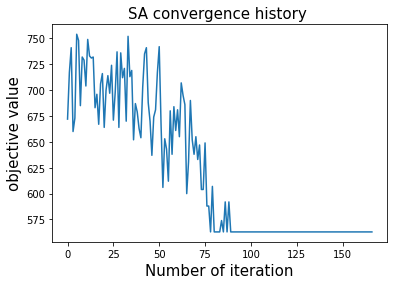

In [40]:
final_t=0.1
t=500
cool_rate = 0.95
alpha,beta = 0.2,0.1
SA(t,final_t,cool_rate,alpha,beta)